In [1]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
zipfile.ZipFile('weather.zip', 'r').extractall()

In [3]:
ls weather

project2.ipynb  RSM00030710.dly  USW00014922.dly  USW00023188.dly
readme.txt      stations.txt     USW00022536.dly  weather.README


In [4]:
def parsefile(filename):
    return np.genfromtxt(filename,
                         delimiter = dly_delimiter,
                         usecols = dly_usecols,
                         dtype = dly_dtype,
                         names = dly_names)

In [5]:
dly_delimiter = [11,4,2,4] + [5,1,1,1] * 31
dly_usecols = [1,2,3] + [4*i for i in range(1,32)]
dly_dtype = [np.int32,np.int32,(np.str_,4)] + [np.int32] * 31
dly_names = ['year','month','obs'] + [str(day) for day in range(1,31+1)]

In [6]:
def unroll(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    dates = np.arange(startdate,startdate + np.timedelta64(1,'M'),np.timedelta64(1,'D'))

    rows = [(date,record[str(i+1)]/10) for i,date in enumerate(dates)]

    return np.array(rows,dtype=[('date','M8[D]'),('value','d')])

In [7]:
def getobs(filename,obs):
    data = np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])

    data['value'][data['value'] == -999.9] = np.nan

    return data

In [8]:
def fillnans(data):
    dates_float = data['date'].astype(np.float64)

    nan = np.isnan(data['value'])

    data['value'][nan] = np.interp(dates_float[nan],dates_float[~nan],data['value'][~nan])

In [9]:
def selectyear(data,year):
    start = np.datetime64('{}'.format(year))
    end = start + np.timedelta64(1,'Y')

    return data[(data['date'] >= start) & (data['date'] < end)]['value']

In [10]:
minneapolis = parsefile('weather/USW00014922.dly')

In [11]:
unroll(minneapolis[0])

array([('1938-04-01', -999.9), ('1938-04-02', -999.9),
       ('1938-04-03', -999.9), ('1938-04-04', -999.9),
       ('1938-04-05', -999.9), ('1938-04-06', -999.9),
       ('1938-04-07', -999.9), ('1938-04-08', -999.9),
       ('1938-04-09',   10.6), ('1938-04-10',   18.9),
       ('1938-04-11',   17.2), ('1938-04-12',   21.7),
       ('1938-04-13',   25.6), ('1938-04-14',   19.4),
       ('1938-04-15',   11.7), ('1938-04-16',   13.3),
       ('1938-04-17',   22.8), ('1938-04-18',   21.7),
       ('1938-04-19',   17.2), ('1938-04-20',   14.4),
       ('1938-04-21',    8.9), ('1938-04-22',   14.4),
       ('1938-04-23',    9.4), ('1938-04-24',   11.1),
       ('1938-04-25',   15.6), ('1938-04-26',   26.7),
       ('1938-04-27',   25.6), ('1938-04-28',   15.6),
       ('1938-04-29',   14.4), ('1938-04-30',   22.2)],
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [12]:
minneapolis_tmax = getobs('weather/USW00014922.dly','TMAX')

In [13]:
minneapolis_tmax

array([('1938-04-01', nan), ('1938-04-02', nan), ('1938-04-03', nan), ...,
       ('2015-09-28', nan), ('2015-09-29', nan), ('2015-09-30', nan)],
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [14]:
fillnans(minneapolis_tmax)

In [15]:
minneapolis_tmax

array([('1938-04-01', 10.6), ('1938-04-02', 10.6), ('1938-04-03', 10.6),
       ..., ('2015-09-28', 25.6), ('2015-09-29', 25.6),
       ('2015-09-30', 25.6)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [16]:
minneapolis_tmax_all = np.vstack([selectyear(minneapolis_tmax,year)[:365] for year in range(1940,2014+1)])
minneapolis_tmax_all

array([[-13.9, -12.8, -12.2, ...,   1.1,   1.7,   1.1],
       [  1.7,   0.6,  -8.3, ...,  -5.6,  -2.2,  -8.9],
       [ -8.9, -14.4, -15. , ...,  -6.1,  -6.7,  -2.2],
       ...,
       [  1.1,  -6.7,  -1.7, ...,  -3.3,  -7.2,  -3.9],
       [ -6.7,  -6.1,  -5.6, ...,  -6.6, -16.6, -18.2],
       [-17.1, -15.5,  -1.6, ..., -12.1, -15.5, -10.5]])

In [17]:
minneapolis_mean = []
for year in minneapolis_tmax_all:
  minneapolis_mean.append(np.mean(year))

minneapolis_mean = np.array(minneapolis_mean)
minneapolis_mean

array([11.83917808, 13.82547945, 12.75561644, 11.87452055, 13.12520548,
       11.6430137 , 13.43260274, 12.54328767, 13.36410959, 13.54219178,
       10.8569863 , 10.44876712, 12.80109589, 13.64356164, 12.78493151,
       12.96191781, 12.65589041, 12.49863014, 13.10438356, 12.94986301,
       12.18849315, 12.48767123, 11.22136986, 12.85616438, 13.30027397,
       11.0890411 , 11.89205479, 11.47780822, 12.64821918, 12.27178082,
       12.07945205, 12.01835616, 10.28465753, 13.11643836, 12.26849315,
       12.26465753, 13.88438356, 12.65945205, 12.21123288, 11.47726027,
       12.87780822, 13.33589041, 12.05726027, 12.1709589 , 12.2860274 ,
       11.75835616, 12.51917808, 15.14986301, 13.84164384, 12.12493151,
       14.04356164, 12.83013699, 12.28273973, 11.29589041, 12.78767123,
       12.55753425, 11.15534247, 12.08328767, 14.54383562, 14.02438356,
       12.90739726, 13.54109589, 12.88109589, 12.93671233, 12.8539726 ,
       13.77972603, 14.43068493, 13.70465753, 12.10739726, 12.33

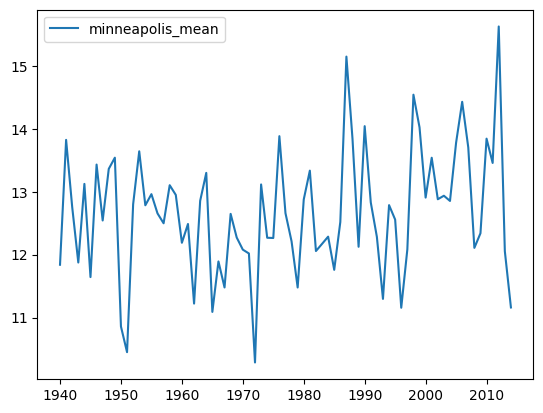

In [18]:
plt.plot(range(1940,2015),minneapolis_mean, label="minneapolis_mean")
plt.legend()
plt.show()

In [19]:
year_range = np.arange(1940,2015)
minneapolis_warmest = year_range[np.argmax(minneapolis_mean)]
minneapolis_warmest

2012

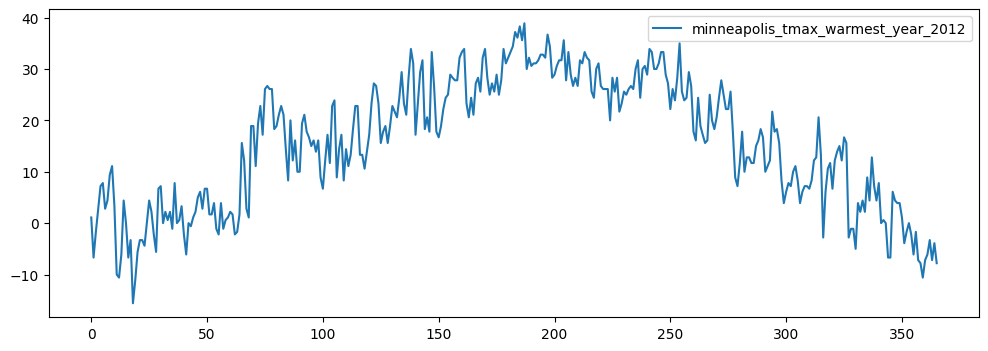

In [20]:
minneapolis_tmax_warmest_year_2012 = selectyear(minneapolis_tmax, minneapolis_warmest)

plt.figure(figsize=(12,4))
plt.plot(range(len(minneapolis_tmax_warmest_year_2012)),minneapolis_tmax_warmest_year_2012, label="minneapolis_tmax_warmest_year_2012")
plt.legend()
plt.show()

In [21]:
sandiego = parsefile('weather/USW00023188.dly')

In [22]:
unroll(sandiego[0])

array([('1939-07-01', 24.4), ('1939-07-02', 23.3), ('1939-07-03', 21.7),
       ('1939-07-04', 21.7), ('1939-07-05', 22.2), ('1939-07-06', 22.2),
       ('1939-07-07', 23.9), ('1939-07-08', 23.9), ('1939-07-09', 24.4),
       ('1939-07-10', 24.4), ('1939-07-11', 26.7), ('1939-07-12', 26.1),
       ('1939-07-13', 22.8), ('1939-07-14', 23.3), ('1939-07-15', 21.7),
       ('1939-07-16', 21.1), ('1939-07-17', 20.6), ('1939-07-18', 22.2),
       ('1939-07-19', 23.3), ('1939-07-20', 23.3), ('1939-07-21', 25. ),
       ('1939-07-22', 24.4), ('1939-07-23', 24.4), ('1939-07-24', 25.6),
       ('1939-07-25', 26.1), ('1939-07-26', 25.6), ('1939-07-27', 23.9),
       ('1939-07-28', 25. ), ('1939-07-29', 23.9), ('1939-07-30', 24.4),
       ('1939-07-31', 24.4)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [23]:
sandiego_tmin = getobs('weather/USW00023188.dly','TMIN')
sandiego_tmin

array([('1939-07-01', 17.2), ('1939-07-02', 18.3), ('1939-07-03', 16.7),
       ..., ('2015-09-28',  nan), ('2015-09-29',  nan),
       ('2015-09-30',  nan)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [24]:
fillnans(sandiego_tmin)

In [25]:
sandiego_tmin_all = np.vstack([selectyear(sandiego_tmin,year)[:365] for year in range(1940,2014+1)])
sandiego_tmin_all

array([[13.9, 12.8, 14.4, ..., 10. , 12.2, 11.7],
       [ 9.4,  8.3,  7.2, ..., 11.7,  9.4,  9.4],
       [ 5.6,  2.2,  4.4, ...,  9.4,  7.8,  7.2],
       ...,
       [ 8.3,  8.3, 10. , ...,  7.2,  8.9,  7.8],
       [ 7.8,  5.6,  6.1, ...,  8.3,  8.9,  8.3],
       [ 8.3,  8.3,  7.8, ...,  8.9, 11.7,  6.1]])

In [26]:
sandiego_mean = []
for year in sandiego_tmin_all:
  sandiego_mean.append(np.mean(year))

sandiego_mean = np.array(sandiego_mean)
sandiego_mean

array([13.36575342, 13.33753425, 12.46356164, 12.86931507, 12.05726027,
       12.68109589, 12.81534247, 12.64493151, 11.66082192, 12.16657534,
       12.72684932, 12.90739726, 12.76410959, 12.87671233, 13.33068493,
       12.90712329, 13.02246575, 14.01452055, 14.33506849, 14.75068493,
       13.25671233, 13.30767123, 12.72273973, 13.15342466, 12.54630137,
       12.93726027, 13.53287671, 13.4709589 , 13.96246575, 14.03945205,
       14.17616438, 13.37232877, 13.92493151, 13.83589041, 13.95452055,
       13.20986301, 15.01342466, 15.11479452, 15.6539726 , 15.02931507,
       15.29945205, 16.17452055, 14.92410959, 16.23315068, 16.39178082,
       14.59561644, 14.14      , 13.8109589 , 13.87808219, 13.80273973,
       13.98465753, 13.5169863 , 14.8830137 , 14.23671233, 13.69643836,
       14.31835616, 14.83890411, 15.1230137 , 14.13123288, 13.40273973,
       14.43808219, 13.93890411, 13.73917808, 14.53835616, 15.09013699,
       14.73643836, 14.76273973, 13.99506849, 14.16246575, 14.42

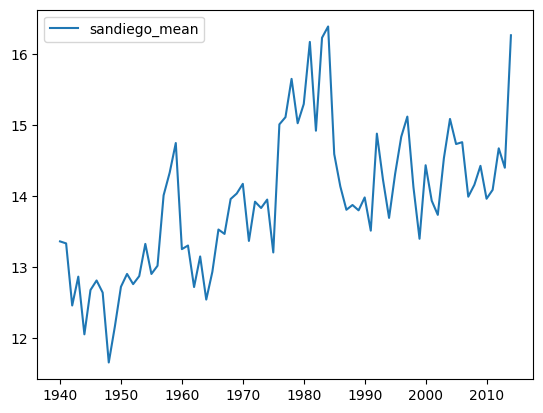

In [27]:
plt.plot(range(1940,2015),sandiego_mean, label="sandiego_mean")
plt.legend()
plt.show()

In [28]:
year_range = np.arange(1940,2015)
sandiego_coldest = year_range[np.argmin(sandiego_mean)]
sandiego_coldest

1948

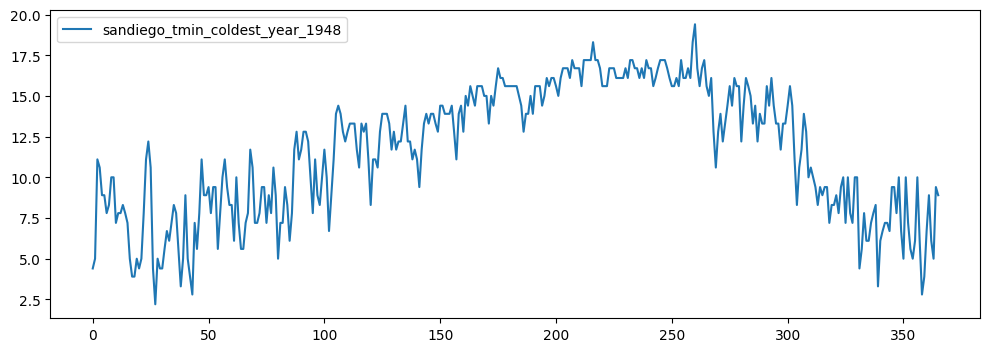

In [29]:
sandiego_tmin_coldest_year_1948 = selectyear(sandiego_tmin, sandiego_coldest)

plt.figure(figsize=(12,4))
plt.plot(range(len(sandiego_tmin_coldest_year_1948)),sandiego_tmin_coldest_year_1948, label="sandiego_tmin_coldest_year_1948")
plt.legend()
plt.show()

In [30]:
minneapolis_tmin = getobs('weather/USW00014922.dly','TMIN')
fillnans(minneapolis_tmin)

sandiego_tmax = getobs('weather/USW00023188.dly','TMAX')
fillnans(sandiego_tmax)

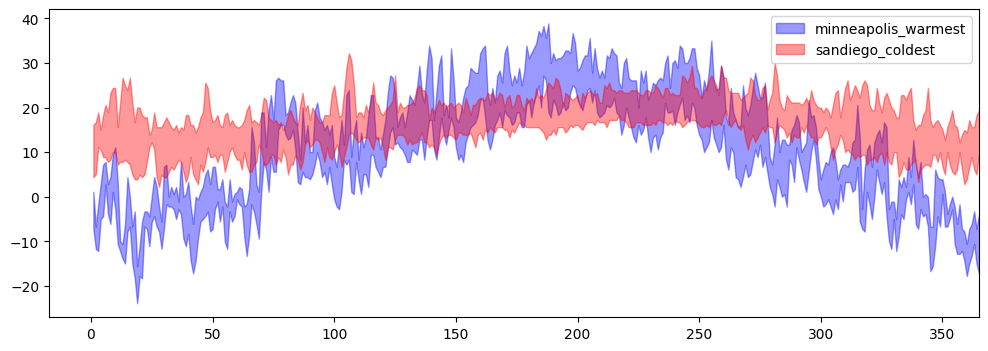

In [31]:
plt.figure(figsize=(12,4))
days = np.arange(1,367)

plt.fill_between(days, selectyear(minneapolis_tmin, minneapolis_warmest), selectyear(minneapolis_tmax,minneapolis_warmest),color='blue',alpha=0.4, label = 'minneapolis_warmest' )

plt.fill_between(days, selectyear(sandiego_tmin, sandiego_coldest), selectyear(sandiego_tmax,sandiego_coldest),color='red',alpha=0.4, label = 'sandiego_coldest' )

plt.axis(xmax=365)
plt.legend(loc='best')